In [1]:
import pandas as pd
import talib
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

In [95]:
from datetime import datetime
import time

In [78]:
import pprint
pp = pprint.PrettyPrinter()

In [117]:
import datafunc; reload(datafunc)
from datafunc import *

In [112]:
df = pd.read_csv('all_dailies.csv')

In [113]:
df['rank'] = get_ranks(df)

In [114]:
top = df[df['rank'] <= 5000].copy()

In [118]:
gcv = get_constrained_volatile(ranked, l = 0.85, u = 1.25)

In [119]:
gcv[:10]

[('GNPX', 1.2702939132514186),
 ('FNGD', 0.3762887543102069),
 ('GDXD', 0.3635670130315188),
 ('CGC', 0.3479628689424749),
 ('NVDS', 0.26394669609148214),
 ('HUT', 0.1623505323023446),
 ('OKLO', 0.1251286981104745),
 ('DJTWW', 0.11407976707533064),
 ('EYPT', 0.09565268041412511),
 ('APLD', 0.09055593336855054)]

In [37]:
df['return'] = df['close'].groupby(df['ticker']).pct_change()
df['cumret'] = df.groupby('ticker')['return'].transform(lambda x: (1 + x).cumprod())

In [39]:
recent = df[df['date'] >= '2022-01-01'].copy()

In [40]:
recent['ret'] = recent['close'].groupby(recent['ticker']).transform(lambda x: x.pct_change())
recent['cumret'] = recent.groupby('ticker')['return'].transform(lambda x: (1 + x).cumprod())

In [41]:
ranked = recent[recent['rank'] < 3000]

In [44]:
recent['ma2'] = recent['close'].groupby(recent['ticker']).transform(lambda x: x.rolling(2).mean())

In [53]:
recent['ma5'] = recent['close'].groupby(recent['ticker']).transform(lambda x: x.rolling(5).mean())

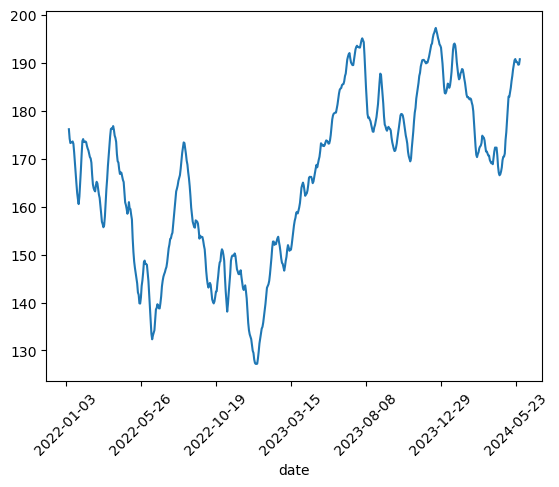

In [54]:
plot(recent, 'aapl', 'ma5')

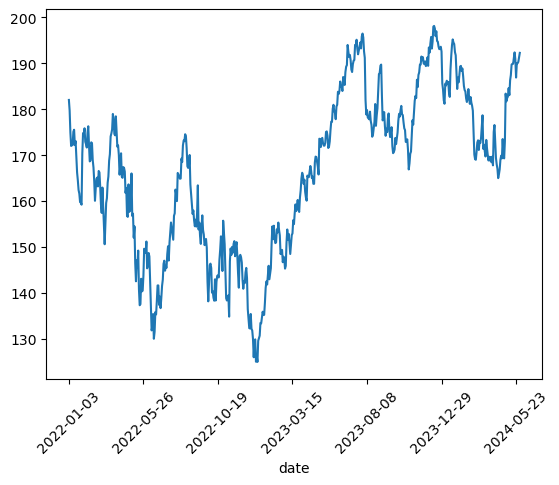

In [52]:
plot(recent, 'aapl')